In [73]:
from bs4 import BeautifulSoup as bs
import requests

## Review of Realme Narzo 50A from Amazon

In [74]:
link = "https://www.amazon.in/realme-Oxygen-Storage-Processor-Battery/product-reviews/B09FKCGP9T/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews"

In [75]:
page = requests.get(link)

In [76]:
page.content

b'<!doctype html><html lang="en-in" class="a-no-js" data-19ax5a9jf="dingo"><!-- sp:feature:head-start -->\n<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>\n<!-- sp:end-feature:head-start -->\n\n<!-- sp:feature:cs-optimization -->\n<meta http-equiv=\'x-dns-prefetch-control\' content=\'on\'>\n<link rel="dns-prefetch" href="https://images-eu.ssl-images-amazon.com">\n<link rel="dns-prefetch" href="https://m.media-amazon.com">\n<link rel="dns-prefetch" href="https://completion.amazon.com">\n<!-- sp:end-feature:cs-optimization -->\n\n<!-- sp:feature:aui-assets -->\n<link rel="stylesheet" href="https://images-eu.ssl-images-amazon.com/images/I/11EIQ5IGqaL._RC|01ZTHTZObnL.css,41C-I1lXVwL.css,31ufSReDtSL.css,013z33uKh2L.css,017DsKjNQJL.css,0131vqwP5UL.css,41EWOOlBJ9L.css,11TIuySqr6L.css,01ElnPiDxWL.css,11Qjwq-j69L.css,01Dm5eKVxwL.css,01IdKcBuAdL.css,01y-XAlI+2L.css,21P6CS3L9LL.css,01oDR3IULNL.css,41CYNGpGlrL.css,01XPHJk60-L.css,01smHc51S9L.css,21aPhFy+riL.c

In [77]:
realme_amazon = []
for i in range(1,10):
    ip=[]  
    base_url = "https://www.amazon.in/realme-Oxygen-Storage-Processor-Battery/product-reviews/B09FKCGP9T/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews" +str(i)
    response = requests.get(base_url)
    soup = bs(response.content,"html.parser")# creating soup object to iterate over the extracted content 
    temp = soup.findAll("span",attrs={"class","a-size-base review-text review-text-content"})# Extracting the content under specific tags  
    for j in range(len(temp)):
        ip.append(temp[j].text)
    realme_amazon=realme_amazon+ip  # adding the reviews of one page to empty list which in future contains all the reviews

In [78]:
### Removing repeated reviews 
realme_amazon = list(set(realme_amazon))

### Writing reviews into text file 

In [79]:
with open("realme_amazon.txt","w",encoding="utf-8") as snp:
    snp.write(str(realme_amazon))

In [80]:
realme_amazon

["\nPlz don't buy itWorst camera phone taking selfie like cheap VGA cameraFront and back both camera worst.It's a joke of 50mp actually it's 8 or 5 mp camera.Don't waste ur hard earn money on such a garbage mobile\n",
 '\nRealme should change the audio jack spot it should be placed in above side it very very wrost and bad because due to this the earphone get out of oder to many times my 2-3 earphone has been get out of oder\n',
 '\nbattery issue and SIM card slot 2nd not working; Call Amazon Customer support they are not even trying to help me over this issue saying you need to wait for some time instead also checked by their tech support team in all ways by downloading the app and performing the test.So not recommended the Purchase of a Phone over Amazon like a lot of issues and not resolution with Tech-Support.Rather buy from somewhere else.\n',
 '\n\n\n\n\n                    The media could not be loaded.\n                \n\n\n\n\xa0It would really be appreciable had I received al

In [81]:
reviews = ' '.join(realme_amazon)

In [82]:
reviews

"\nPlz don't buy itWorst camera phone taking selfie like cheap VGA cameraFront and back both camera worst.It's a joke of 50mp actually it's 8 or 5 mp camera.Don't waste ur hard earn money on such a garbage mobile\n \nRealme should change the audio jack spot it should be placed in above side it very very wrost and bad because due to this the earphone get out of oder to many times my 2-3 earphone has been get out of oder\n \nbattery issue and SIM card slot 2nd not working; Call Amazon Customer support they are not even trying to help me over this issue saying you need to wait for some time instead also checked by their tech support team in all ways by downloading the app and performing the test.So not recommended the Purchase of a Phone over Amazon like a lot of issues and not resolution with Tech-Support.Rather buy from somewhere else.\n \n\n\n\n\n                    The media could not be loaded.\n                \n\n\n\n\xa0It would really be appreciable had I received all together pe

In [20]:
!pip install selenium

     -------------------------------------- 981.4/981.4 kB 5.6 MB/s eta 0:00:00
     -------------------------------------- 359.0/359.0 kB 7.6 MB/s eta 0:00:00
     ---------------------------------------- 55.8/55.8 kB ? eta 0:00:00
     ---------------------------------------- 2.4/2.4 MB 10.3 MB/s eta 0:00:00
     ---------------------------------------- 58.2/58.2 kB 3.2 MB/s eta 0:00:00


In [21]:
import pandas as pd
import numpy as np
#import tweepy
import re 
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
wordnet = WordNetLemmatizer()
import re
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import requests
from bs4 import BeautifulSoup as bs
from selenium import webdriver

## Data Cleaning

#### Removing punctuations

In [83]:
no_punc_text = reviews.translate(str.maketrans('', '', string.punctuation)) 
no_punc_text

'\nPlz dont buy itWorst camera phone taking selfie like cheap VGA cameraFront and back both camera worstIts a joke of 50mp actually its 8 or 5 mp cameraDont waste ur hard earn money on such a garbage mobile\n \nRealme should change the audio jack spot it should be placed in above side it very very wrost and bad because due to this the earphone get out of oder to many times my 23 earphone has been get out of oder\n \nbattery issue and SIM card slot 2nd not working Call Amazon Customer support they are not even trying to help me over this issue saying you need to wait for some time instead also checked by their tech support team in all ways by downloading the app and performing the testSo not recommended the Purchase of a Phone over Amazon like a lot of issues and not resolution with TechSupportRather buy from somewhere else\n \n\n\n\n\n                    The media could not be loaded\n                \n\n\n\n\xa0It would really be appreciable had I received all together perfect piece f

In [84]:
#no_punc_text = re.sub(r'[’‘]', '', reviews).lower()
no_punc_text = re.sub("[^A-Za-z" "]+"," ",no_punc_text).lower() 
no_punc_text = re.sub("[0-9" "]+"," ",no_punc_text).lower() 
no_punc_text = re.sub(r'^https?:\/\/.*[\r\n]*', '', no_punc_text).lower()

In [85]:
no_punc_text

' plz dont buy itworst camera phone taking selfie like cheap vga camerafront and back both camera worstits a joke of mp actually its or mp cameradont waste ur hard earn money on such a garbage mobile realme should change the audio jack spot it should be placed in above side it very very wrost and bad because due to this the earphone get out of oder to many times my earphone has been get out of oder battery issue and sim card slot nd not working call amazon customer support they are not even trying to help me over this issue saying you need to wait for some time instead also checked by their tech support team in all ways by downloading the app and performing the testso not recommended the purchase of a phone over amazon like a lot of issues and not resolution with techsupportrather buy from somewhere else the media could not be loaded it would really be appreciable had i received all together perfect piece from amazon as it is the trusted online shop for me and also for many first of al

In [27]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jhishna2022\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [86]:
from nltk.tokenize import word_tokenize
text_tokens=word_tokenize(no_punc_text)
print(text_tokens)

['plz', 'dont', 'buy', 'itworst', 'camera', 'phone', 'taking', 'selfie', 'like', 'cheap', 'vga', 'camerafront', 'and', 'back', 'both', 'camera', 'worstits', 'a', 'joke', 'of', 'mp', 'actually', 'its', 'or', 'mp', 'cameradont', 'waste', 'ur', 'hard', 'earn', 'money', 'on', 'such', 'a', 'garbage', 'mobile', 'realme', 'should', 'change', 'the', 'audio', 'jack', 'spot', 'it', 'should', 'be', 'placed', 'in', 'above', 'side', 'it', 'very', 'very', 'wrost', 'and', 'bad', 'because', 'due', 'to', 'this', 'the', 'earphone', 'get', 'out', 'of', 'oder', 'to', 'many', 'times', 'my', 'earphone', 'has', 'been', 'get', 'out', 'of', 'oder', 'battery', 'issue', 'and', 'sim', 'card', 'slot', 'nd', 'not', 'working', 'call', 'amazon', 'customer', 'support', 'they', 'are', 'not', 'even', 'trying', 'to', 'help', 'me', 'over', 'this', 'issue', 'saying', 'you', 'need', 'to', 'wait', 'for', 'some', 'time', 'instead', 'also', 'checked', 'by', 'their', 'tech', 'support', 'team', 'in', 'all', 'ways', 'by', 'downlo

In [29]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jhishna2022\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Tokens count

In [87]:
len(text_tokens)

482

### Removing stopwords

In [88]:
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')

no_stop_tokens=[word for word in text_tokens if not word in my_stop_words]
no_stop_tokens

['plz',
 'dont',
 'buy',
 'itworst',
 'camera',
 'phone',
 'taking',
 'selfie',
 'like',
 'cheap',
 'vga',
 'camerafront',
 'back',
 'camera',
 'worstits',
 'joke',
 'mp',
 'actually',
 'mp',
 'cameradont',
 'waste',
 'ur',
 'hard',
 'earn',
 'money',
 'garbage',
 'mobile',
 'realme',
 'change',
 'audio',
 'jack',
 'spot',
 'placed',
 'side',
 'wrost',
 'bad',
 'due',
 'earphone',
 'get',
 'oder',
 'many',
 'times',
 'earphone',
 'get',
 'oder',
 'battery',
 'issue',
 'sim',
 'card',
 'slot',
 'nd',
 'working',
 'call',
 'amazon',
 'customer',
 'support',
 'even',
 'trying',
 'help',
 'issue',
 'saying',
 'need',
 'wait',
 'time',
 'instead',
 'also',
 'checked',
 'tech',
 'support',
 'team',
 'ways',
 'downloading',
 'app',
 'performing',
 'testso',
 'recommended',
 'purchase',
 'phone',
 'amazon',
 'like',
 'lot',
 'issues',
 'resolution',
 'techsupportrather',
 'buy',
 'somewhere',
 'else',
 'media',
 'could',
 'loaded',
 'would',
 'really',
 'appreciable',
 'received',
 'together',

#### Joining all tokens into single paragraph

In [89]:
text =" ".join(no_stop_tokens)

In [90]:
text

'plz dont buy itworst camera phone taking selfie like cheap vga camerafront back camera worstits joke mp actually mp cameradont waste ur hard earn money garbage mobile realme change audio jack spot placed side wrost bad due earphone get oder many times earphone get oder battery issue sim card slot nd working call amazon customer support even trying help issue saying need wait time instead also checked tech support team ways downloading app performing testso recommended purchase phone amazon like lot issues resolution techsupportrather buy somewhere else media could loaded would really appreciable received together perfect piece amazon trusted online shop also many first wants best performance phones buy dont expect anything thisprossuper performancebattery liferealme ui cons camera worst even mp takes pictures like mp front camera dull old redmi phone gives good front cam quality front cam worst display gives pixel output videos play p even p wallpaper also displays like pat least give

### Word Cloud

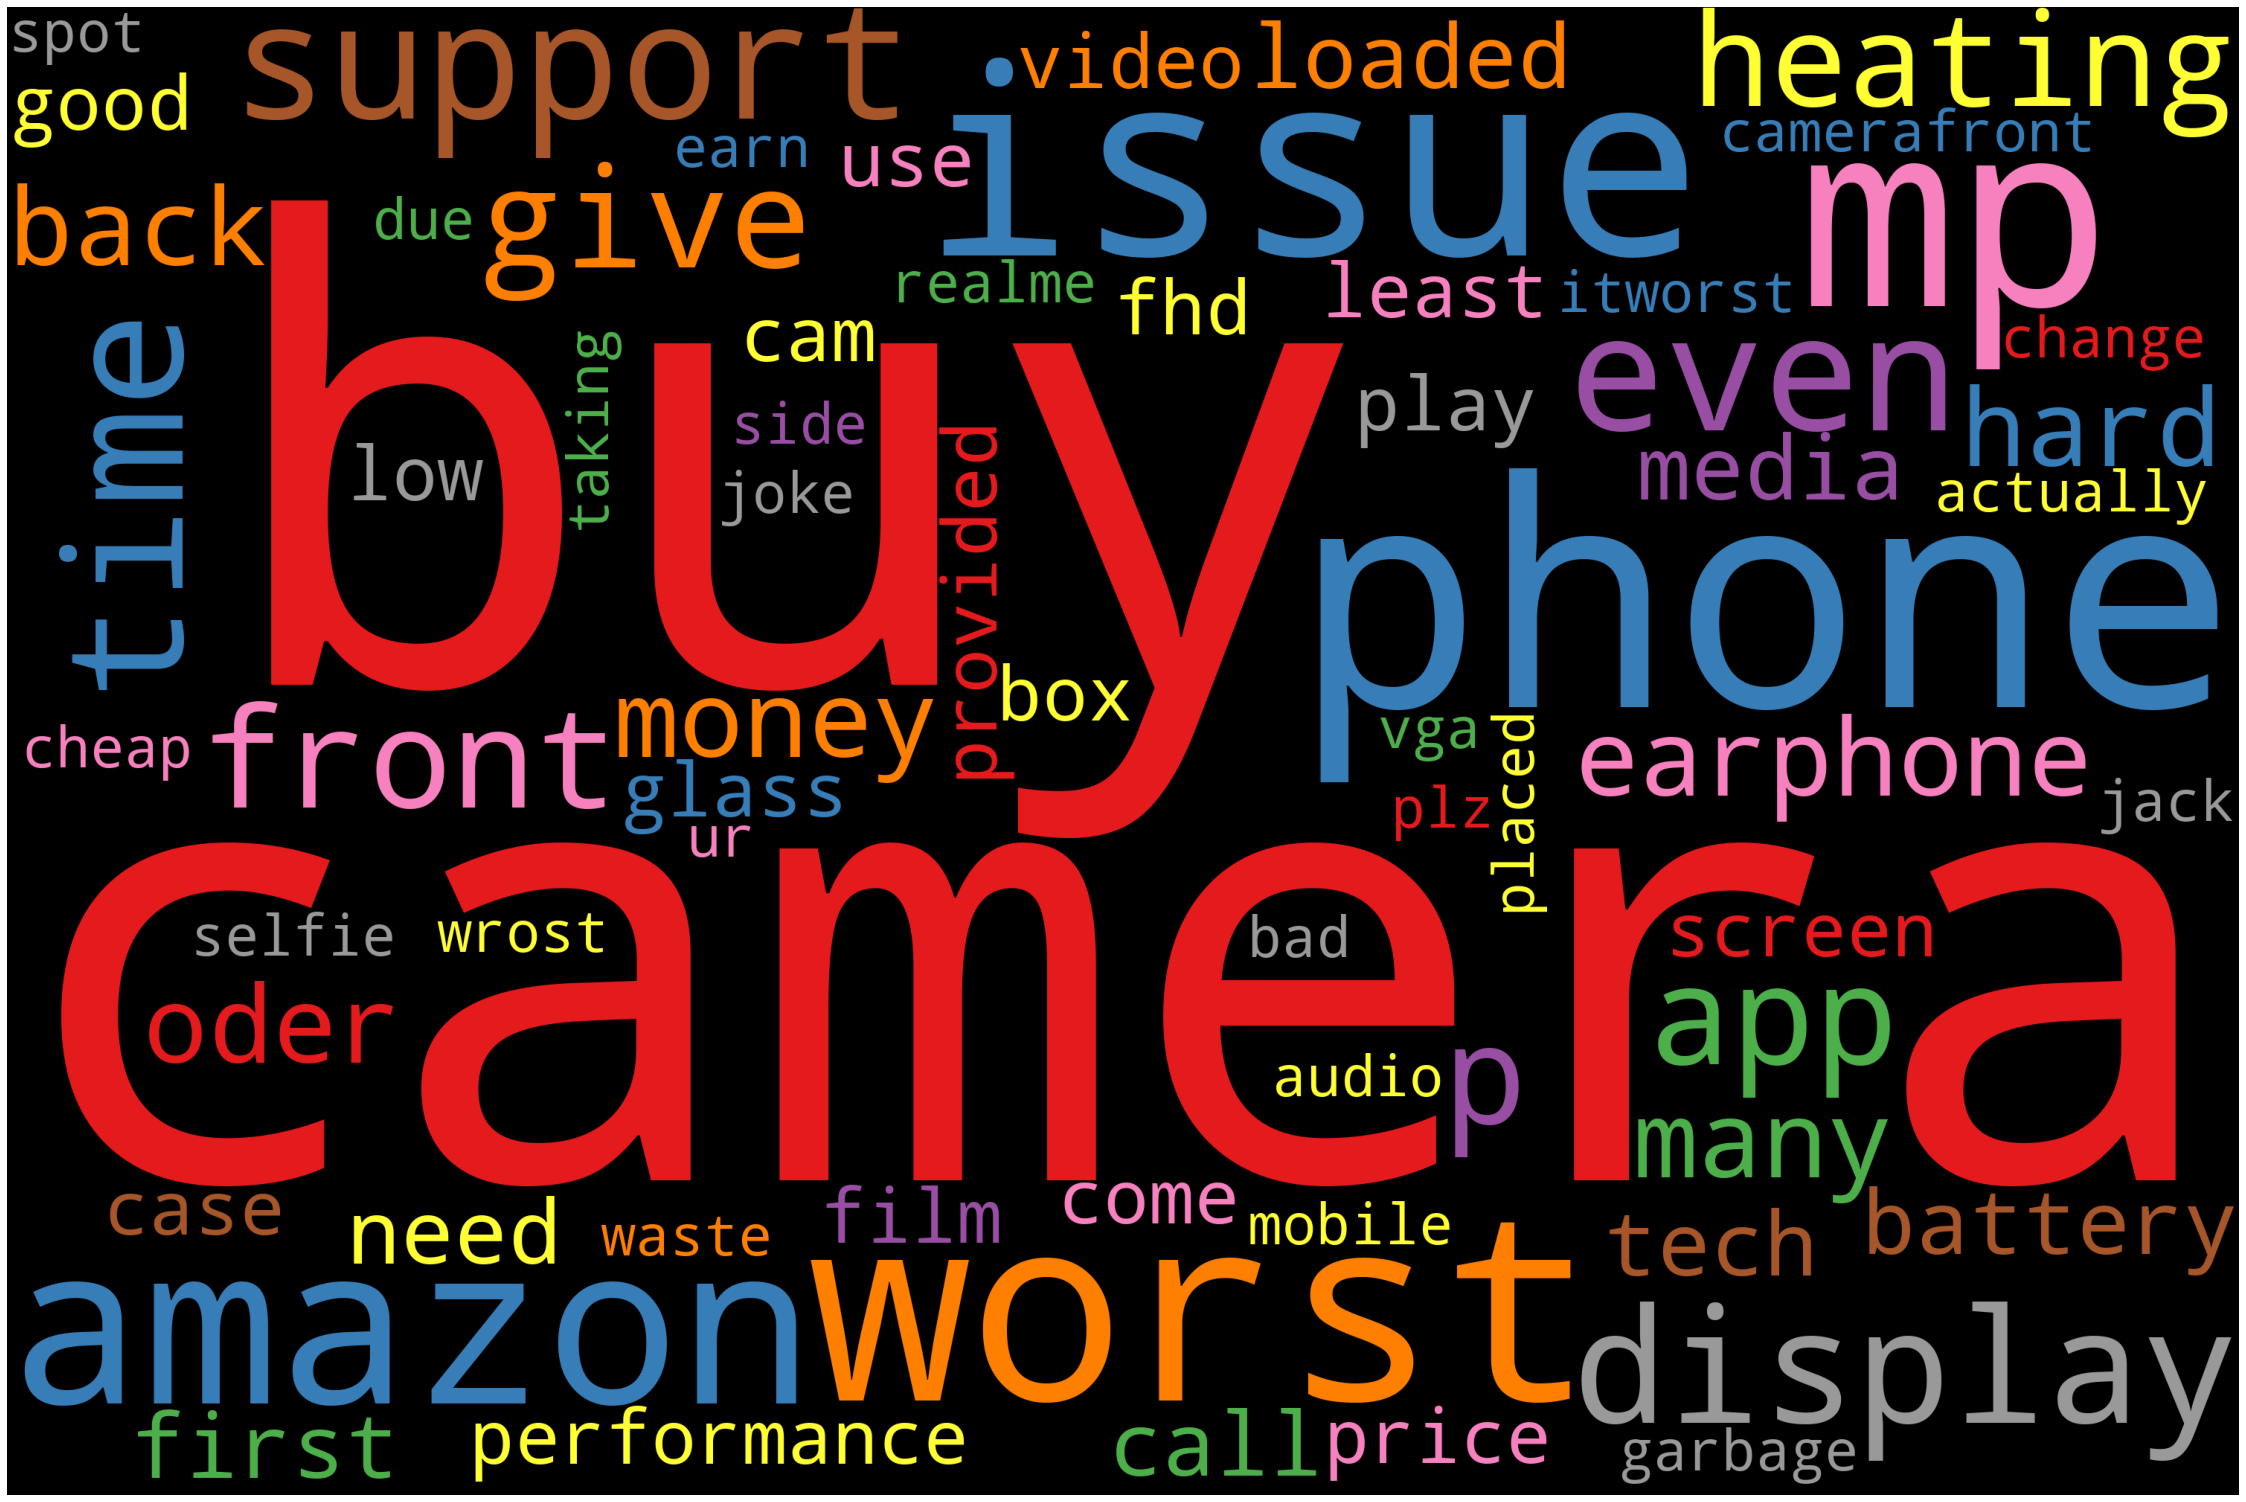

In [91]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')
    

from wordcloud import WordCloud, STOPWORDS
STOPWORDS.add('refresh')
wordcloud=WordCloud(width=3000,height=2000,background_color='black',max_words=70,
                   colormap='Set1',stopwords=STOPWORDS).generate(text)
plot_cloud(wordcloud)


## Emotion Mining

In [98]:
from nltk import tokenize
sentences=tokenize.sent_tokenize(' '.join(realme_amazon))
sentences

["\nPlz don't buy itWorst camera phone taking selfie like cheap VGA cameraFront and back both camera worst.It's a joke of 50mp actually it's 8 or 5 mp camera.Don't waste ur hard earn money on such a garbage mobile\n \nRealme should change the audio jack spot it should be placed in above side it very very wrost and bad because due to this the earphone get out of oder to many times my 2-3 earphone has been get out of oder\n \nbattery issue and SIM card slot 2nd not working; Call Amazon Customer support they are not even trying to help me over this issue saying you need to wait for some time instead also checked by their tech support team in all ways by downloading the app and performing the test.So not recommended the Purchase of a Phone over Amazon like a lot of issues and not resolution with Tech-Support.Rather buy from somewhere else.",
 'The media could not be loaded.',
 'It would really be appreciable had I received all together perfect piece from AMAZON AS IT IS THE TRUSTED ONLINE 

In [99]:
sentences_df= pd.DataFrame(sentences,columns=['sentence'])
sentences_df

,sentence
0,\nPlz don't buy itWorst camera phone taking se...
1,The media could not be loaded.
2,It would really be appreciable had I received ...
3,First of all those who wants best performance ...
4,Camera ( Worst even if it 50MP it takes pictur...
5,Front camera is too dull.
6,My old Redmi 4 phone gives good front cam qual...
7,Front cam worst.2.
8,Display (It gives 360pixel output when videos ...
9,Even 720p wallpaper also displays like 320p)At...


### Afinn file contains all words with their scores

In [93]:
afin = pd.read_csv("C:\\Users\\jhishna2022\\Downloads\\Afinn.csv",sep=',',encoding='Latin-1')
afin.shape

(2477, 2)

In [95]:
afin.head()

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


In [101]:
affinity_scores=afin.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

### Define a function : score each word in a sentence in lemmatised form, but calculate the score for the whole original sentence

In [102]:
import spacy
nlp=spacy.load('en_core_web_sm')
sentiment_lexicon=affinity_scores

def calculate_sentiment(text:str=None):
    sent_score=0
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [103]:
# manual testing
calculate_sentiment(text='abilities')

2

### Calculating sentiment value for each sentence

In [104]:
sentences_df['sentiment_value']=sentences_df['sentence'].apply(calculate_sentiment)
sentences_df['sentiment_value']

0     6
1     0
2     4
3     4
4    -1
5    -2
6     3
7     0
8     0
9     2
10   -2
11    0
12    0
13    0
14   -7
15   -4
16   -3
17    2
18   -3
Name: sentiment_value, dtype: int64

### no of words in a sentence

In [105]:
sentences_df['word_count']=sentences_df['sentence'].str.split().apply(len)
sentences_df['word_count']

0     154
1       6
2      27
3      23
4      12
5       5
6      12
7       3
8      10
9      19
10     17
11      6
12     20
13      5
14    101
15     22
16      5
17     33
18     15
Name: word_count, dtype: int64

In [106]:
sentences_df.sort_values(by='sentiment_value')

,sentence,sentiment_value,word_count
14,"Sound Is very low , phone touch don't work pro...",-7,101
15,No replacement first time in history product d...,-4,22
18,No screen protector film and case in this box ...,-3,15
16,Heating problem is very hard.,-3,5
5,Front camera is too dull.,-2,5
10,"No case provided, no inbuilt tamper glass( For...",-2,17
4,Camera ( Worst even if it 50MP it takes pictur...,-1,12
1,The media could not be loaded.,0,6
7,Front cam worst.2.,0,3
8,Display (It gives 360pixel output when videos ...,0,10


In [108]:
sentences_df['sentiment_value'].describe()

count    19.000000
mean     -0.052632
std       3.135348
min      -7.000000
25%      -2.000000
50%       0.000000
75%       2.000000
max       6.000000
Name: sentiment_value, dtype: float64

### negative sentiment score

In [109]:
sentences_df[sentences_df['sentiment_value']<=0]

,sentence,sentiment_value,word_count
1,The media could not be loaded.,0,6
4,Camera ( Worst even if it 50MP it takes pictur...,-1,12
5,Front camera is too dull.,-2,5
7,Front cam worst.2.,0,3
8,Display (It gives 360pixel output when videos ...,0,10
10,"No case provided, no inbuilt tamper glass( For...",-2,17
11,"Last but not the least, Overpriced.",0,6
12,These featured phone to be come in 9000/-This ...,0,20
13,For other features don't buy.,0,5
14,"Sound Is very low , phone touch don't work pro...",-7,101


### Positive scores

In [111]:
sentences_df[sentences_df['sentiment_value']>0]

,sentence,sentiment_value,word_count
0,\nPlz don't buy itWorst camera phone taking se...,6,154
2,It would really be appreciable had I received ...,4,27
3,First of all those who wants best performance ...,4,23
6,My old Redmi 4 phone gives good front cam qual...,3,12
9,Even 720p wallpaper also displays like 320p)At...,2,19
17,Highly heating when only data on and play vide...,2,33


In [113]:
import warnings
warnings.filterwarnings('ignore')

### Visualization of Sentiment Score

<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

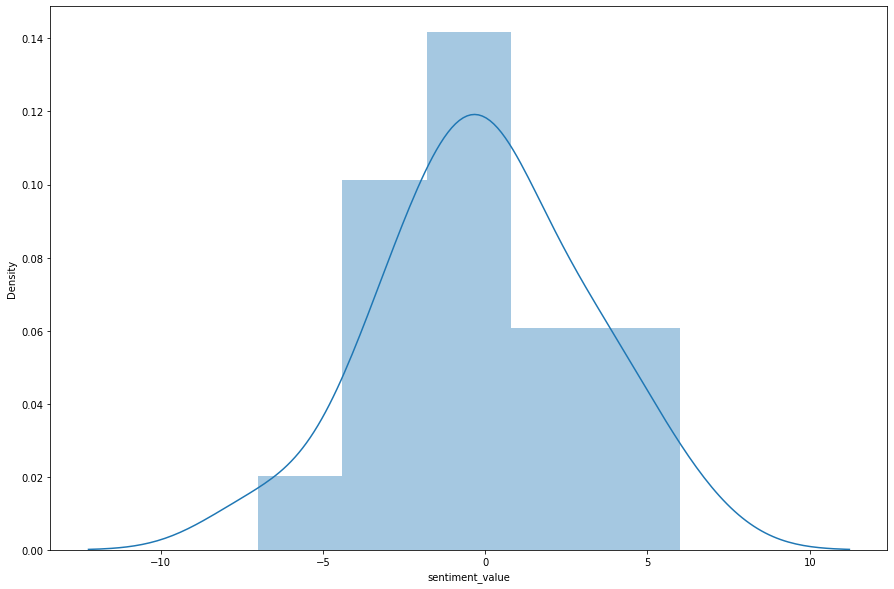

In [114]:
# Plotting the sentiment value for whole review
import seaborn as sns
plt.figure(figsize=(15,10))
sns.distplot(sentences_df['sentiment_value'])

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

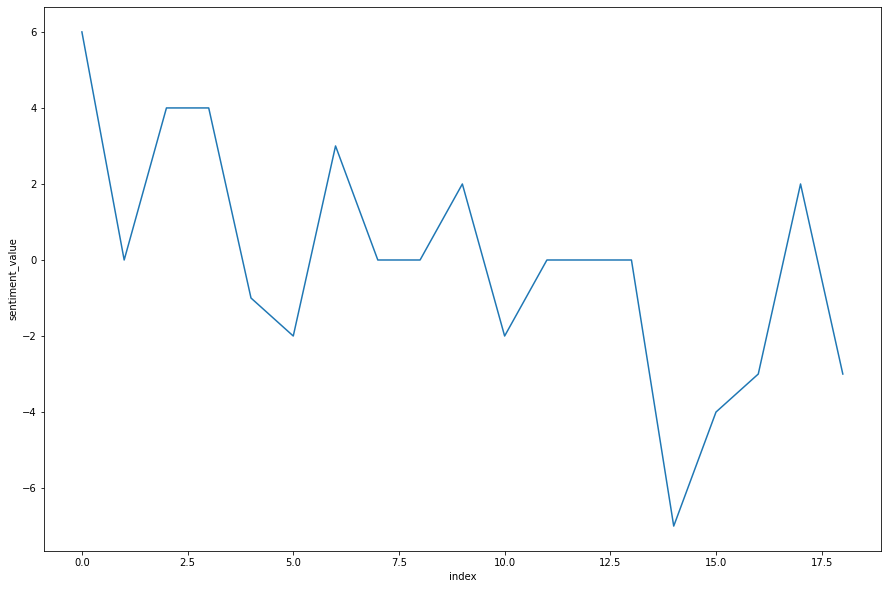

In [115]:
# Plotting the line plot for sentiment value of whole review

sentences_df['index']=range(0,len(sentences_df))
plt.figure(figsize=(15,10))
sns.lineplot(y='sentiment_value',x='index',data=sentences_df)

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

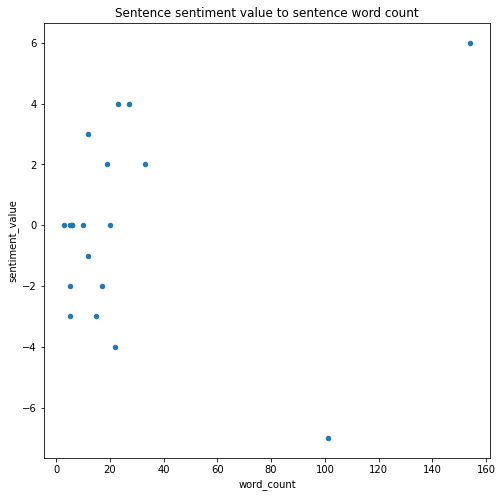

In [116]:
# Correlation analysis
sentences_df.plot.scatter(x='word_count',y='sentiment_value',figsize=(8,8),title='Sentence sentiment value to sentence word count')